torch.Size([1, 1, 16, 16])
torch.Size([1, 100, 16, 16])
torch.Size([1, 200, 16, 16])
torch.Size([1, 200]) fc1
torch.Size([1, 25]) fc2
torch.Size([1, 10]) out


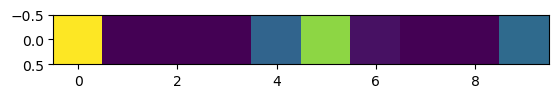

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.out_channels = out_channels  # Store out_channels as an instance variable
        self.conv1 = nn.Conv2d(in_channels, (out_channels + in_channels) // 2, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d((out_channels + in_channels) // 2, out_channels, kernel_size=3, padding=1)

        # Initialize fc1 later
        self.fc1 = None  # Initialize later based on input size
        self.fc2 = nn.Linear(out_channels, 25)  # Adjust output size if needed
        self.out = nn.Linear(25, 10)  # The input size must match the output of fc2

    def forward(self, t):
        t = F.max_pool2d(t, kernel_size=3, stride=2, padding=1)
        print(t.shape)
        t = self.conv1(t)
        print(t.shape)
        t = F.relu(t)
        t = self.conv2(t)
        print(t.shape)
        t = F.relu(t)

        # Flatten the tensor for fully connected layers
        t = t.view(t.size(0), -1)
        if self.fc1 is None:
            self.fc1 = nn.Linear(t.size(1), self.out_channels)

        # Dynamically set the first linear layer based on the flattened size

        t = self.fc1(t)
        print(t.shape, "fc1")
        t = F.relu(t)
        t = self.fc2(t)
        print(t.shape, "fc2")
        t = F.relu(t)
        t = self.out(t)
        print(t.shape, "out")
        t = F.relu(t)
        return t

# Example usage
network = Down(1, 200)
real_samples_labels = torch.randint(0, 100, (1, 1, 32, 32), dtype=torch.float32)
out = network(real_samples_labels)
#print(out.shape)  # Should output: torch.Size([1, 10])

import matplotlib.pyplot as plt
plt.imshow(out[:,:].detach())